In [ ]:
import pandas as pd

df = pd.read_csv('dados.csv')
# importando a base de dados como um dataframe pela biblioteca do pandas

In [ ]:
df.head(5)

,data_hora,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,Nublado,Não,Sim,Inverno
1,2015-01-04 01:00:00,138,NaN,NaN,93.0,5.0,Céu limpo,Não,Sim,Inverno
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,Céu limpo,Não,Sim,Inverno
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,Céu limpo,Não,Sim,Inverno
4,2015-01-04 04:00:00,47,NaN,NaN,93.0,6.5,Céu limpo,Não,Sim,Inverno


In [ ]:
df.shape
# retorna a quantidade de linhas e colunas da base, nesta ordem

(17429, 10)

In [ ]:
df.info()
# retorna as informações sobre as colunas da base

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17429 entries, 0 to 17428
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   data_hora         17429 non-null  object 
 1   contagem          17429 non-null  int64  
 2   temperatura       17406 non-null  float64
 3   sensacao_termica  17406 non-null  float64
 4   umidade           17429 non-null  float64
 5   velocidade_vento  17429 non-null  float64
 6   clima             17429 non-null  object 
 7   feriado           17429 non-null  object 
 8   fim_de_semana     17429 non-null  object 
 9   estacao           17429 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 1.3+ MB


In [ ]:
df.isnull().sum()
# quantidade de linhas vazias por coluna

,0
data_hora,0
contagem,0
temperatura,23
sensacao_termica,23
umidade,0
velocidade_vento,0
clima,0
feriado,0
fim_de_semana,0
estacao,0


In [ ]:
df.dropna()
# esta função exclui os dados vazios. Mas não recomendamos o uso, pode enviesar.

,data_hora,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,Nublado,Não,Sim,Inverno
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,Céu limpo,Não,Sim,Inverno
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,Céu limpo,Não,Sim,Inverno
5,2015-01-04 05:00:00,46,2.0,2.0,93.0,4.0,Céu limpo,Não,Sim,Inverno
6,2015-01-04 06:00:00,51,1.0,-1.0,100.0,7.0,Parcialmente nublado,Não,Sim,Inverno
...,...,...,...,...,...,...,...,...,...,...
17424,2016-12-11 10:00:00,1098,7.5,4.5,87.0,16.0,Céu limpo,Não,Sim,Inverno
17425,2015-06-05 18:00:00,3411,23.0,23.0,50.0,26.0,Parcialmente nublado,Não,Não,Verão
17426,2015-12-12 11:00:00,1100,12.0,12.0,82.0,20.0,Chuva leve,Não,Sim,Inverno
17427,2016-02-02 17:00:00,2846,8.0,4.5,59.5,23.0,Parcialmente nublado,Não,Não,Inverno


In [ ]:
df['temperatura'].interpolate(method='linear')
df['sensacao_termica'].interpolate(method='linear')
# função que executa a interpolação entre os dados: interpolate. Nela, devemos classificar o método desta equilíbrio de dados. Neste caso, linear.
# o interpolate já utiliza o método linear por padrão. Então não precisamos declarar se for o caso.

,sensacao_termica
0,2.00
1,2.25
2,2.50
3,2.00
4,2.00
...,...
17424,4.50
17425,23.00
17426,12.00
17427,4.50


In [ ]:
df.head()
# antes não havia dados, criamos a interpolação de dados. Garantimos todos os dados através da média.

,data_hora,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,Nublado,Não,Sim,Inverno
1,2015-01-04 01:00:00,138,NaN,NaN,93.0,5.0,Céu limpo,Não,Sim,Inverno
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,Céu limpo,Não,Sim,Inverno
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,Céu limpo,Não,Sim,Inverno
4,2015-01-04 04:00:00,47,NaN,NaN,93.0,6.5,Céu limpo,Não,Sim,Inverno


In [ ]:
df.duplicated().sum()
# esta é uma das formas de checarmos a quantidade de dados duplicados na nossa base

np.int64(15)

In [ ]:
dados_duplicados = df.duplicated(keep=False)
# forma de criar uma coluna que identifica se o valor é único no df. Se não for, ele marca esta coluna como 'true'

In [ ]:
df[dados_duplicados]
# aqui, utilizamos o false e true para listar somente aquelas que são valores verdadeiros dada a coluna anterior

,data_hora,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao
519,2015-01-25 16:00:00,1238,8.0,5.0,71.0,18.0,Nublado,Não,Sim,Inverno
869,2015-02-09 06:00:00,479,5.0,3.5,87.0,6.5,Parcialmente nublado,Não,Não,Inverno
3655,2015-06-05 18:00:00,3411,23.0,23.0,50.0,26.0,Parcialmente nublado,Não,Não,Verão
4167,2015-06-27 02:00:00,337,15.5,15.5,74.5,18.0,Parcialmente nublado,Não,Sim,Verão
4658,2015-07-17 14:00:00,1882,24.5,24.5,44.0,29.5,Parcialmente nublado,Não,Não,Verão
5360,2015-08-15 23:00:00,759,17.0,17.0,59.0,6.0,Céu limpo,Não,Sim,Verão
8174,2015-12-12 11:00:00,1100,12.0,12.0,82.0,20.0,Chuva leve,Não,Sim,Inverno
8175,2015-12-12 12:00:00,1308,13.0,13.0,77.0,26.0,Chuva leve,Não,Sim,Inverno
8528,2015-12-27 05:00:00,57,15.0,15.0,72.0,31.0,Parcialmente nublado,Não,Sim,Inverno
9428,2016-02-02 17:00:00,2846,8.0,4.5,59.5,23.0,Parcialmente nublado,Não,Não,Inverno


In [ ]:
df[dados_duplicados].sort_values('data_hora')
# organizando as linhas por data e hora para fácil visualização

,data_hora,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao
519,2015-01-25 16:00:00,1238,8.0,5.0,71.0,18.0,Nublado,Não,Sim,Inverno
17422,2015-01-25 16:00:00,1238,8.0,5.0,71.0,18.0,Nublado,Não,Sim,Inverno
869,2015-02-09 06:00:00,479,5.0,3.5,87.0,6.5,Parcialmente nublado,Não,Não,Inverno
17417,2015-02-09 06:00:00,479,5.0,3.5,87.0,6.5,Parcialmente nublado,Não,Não,Inverno
3655,2015-06-05 18:00:00,3411,23.0,23.0,50.0,26.0,Parcialmente nublado,Não,Não,Verão
17425,2015-06-05 18:00:00,3411,23.0,23.0,50.0,26.0,Parcialmente nublado,Não,Não,Verão
4167,2015-06-27 02:00:00,337,15.5,15.5,74.5,18.0,Parcialmente nublado,Não,Sim,Verão
17421,2015-06-27 02:00:00,337,15.5,15.5,74.5,18.0,Parcialmente nublado,Não,Sim,Verão
4658,2015-07-17 14:00:00,1882,24.5,24.5,44.0,29.5,Parcialmente nublado,Não,Não,Verão
17418,2015-07-17 14:00:00,1882,24.5,24.5,44.0,29.5,Parcialmente nublado,Não,Não,Verão


In [ ]:
df_limpo = df.drop_duplicates()
# criando um df sem dados duplicados

In [ ]:
df_limpo.duplicated().sum()
# conferindo

np.int64(0)

In [ ]:
df_limpo.describe()
# esta função irá retornar as informações mais comuns em estatistíca

,contagem,temperatura,sensacao_termica,umidade,velocidade_vento
count,17414.000000,17391.000000,17391.000000,17414.000000,17414.000000
mean,1143.101642,12.474805,11.528942,72.324954,15.913063
std,1085.108068,5.571165,6.614428,14.313186,7.894570
min,0.000000,-1.500000,-6.000000,20.500000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000
max,7860.000000,34.000000,34.000000,100.000000,56.500000


In [ ]:
import seaborn as sns
# esta biblioteca irá nos permitir manipular e exibir a distribuição dos dados

In [ ]:
import matplotlib.pyplot as plt
# esta biblioteca permitirá que gráficos sejam criados

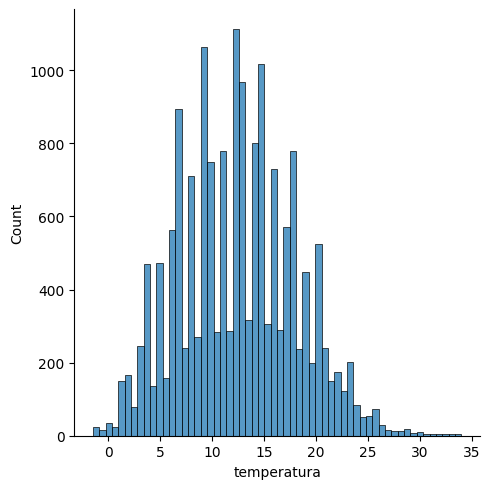

In [ ]:
sns.displot(df_limpo, x = 'temperatura')
# o gráfico do estilo histograma irá se basear no mínimo e máximo encontrado e exibir quantos dados se encontram em determinado valor na coluna, nos permitindo concluir a tendência dos dados

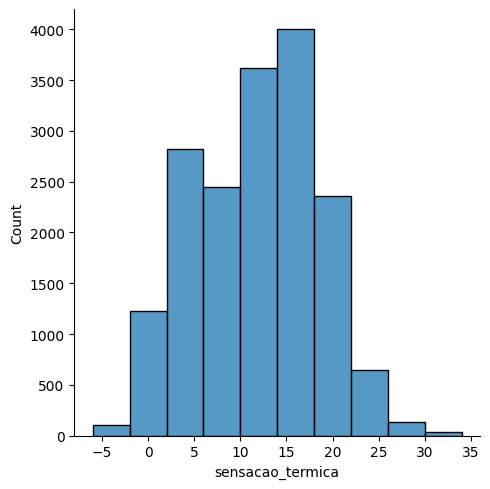

In [ ]:
sns.displot(df_limpo, x = 'sensacao_termica', bins=10)
# a varíavel bins serve para definir a granularidade dos dados apresentados settando a quantidade que irá aparecer de colunas

<Axes: xlabel='velocidade_vento', ylabel='contagem'>

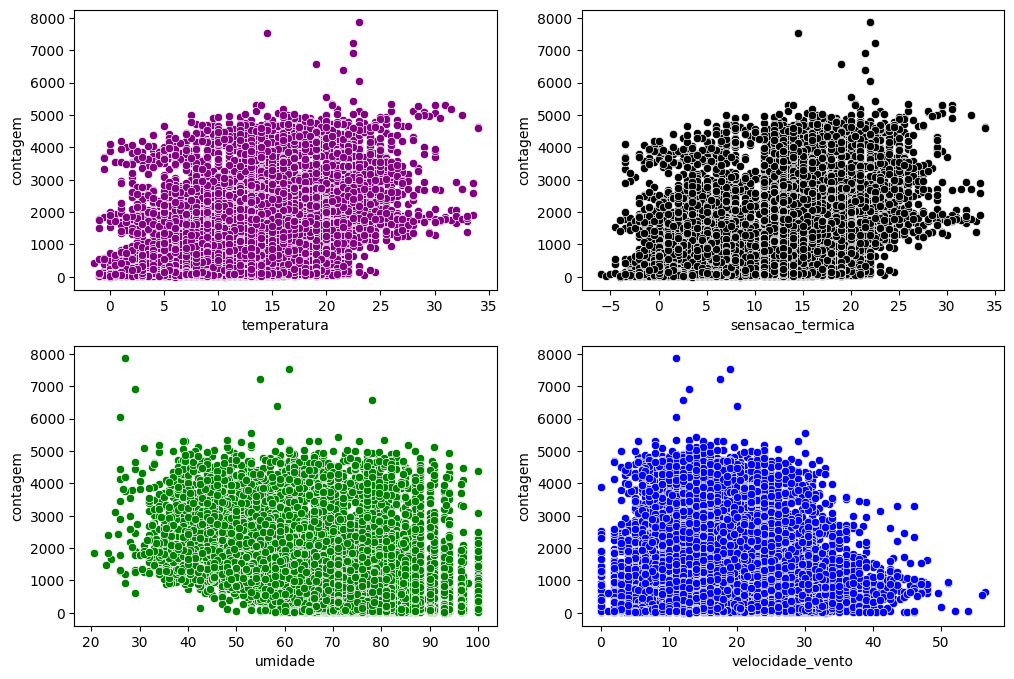

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

sns.scatterplot(ax=axes[0, 0], data = df_limpo, x='temperatura', y='contagem', color='purple')
sns.scatterplot(ax=axes[0, 1], data = df_limpo, x='sensacao_termica', y='contagem', color='black')
sns.scatterplot(ax=axes[1, 0], data = df_limpo, x='umidade', y='contagem', color='green')
sns.scatterplot(ax=axes[1, 1], data = df_limpo, x='velocidade_vento', y='contagem', color='blue')

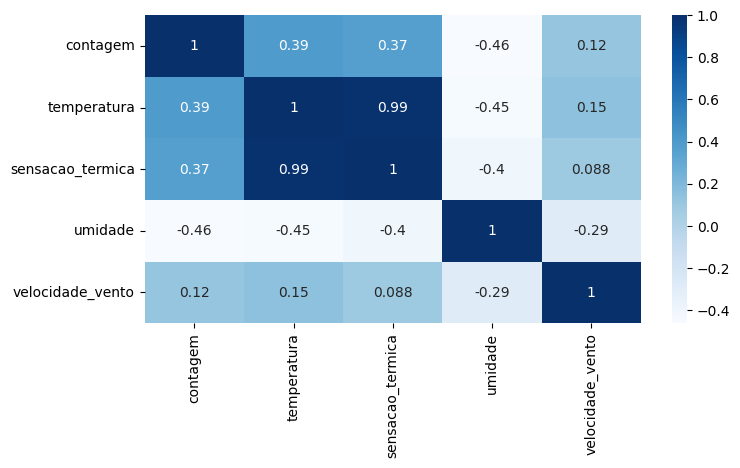

In [ ]:
plt.figure(figsize=(8, 4))
sns.heatmap(df_limpo.corr(numeric_only=True), annot=True, cmap='Blues')
plt.show()

<Axes: xlabel='sensacao_termica', ylabel='umidade'>

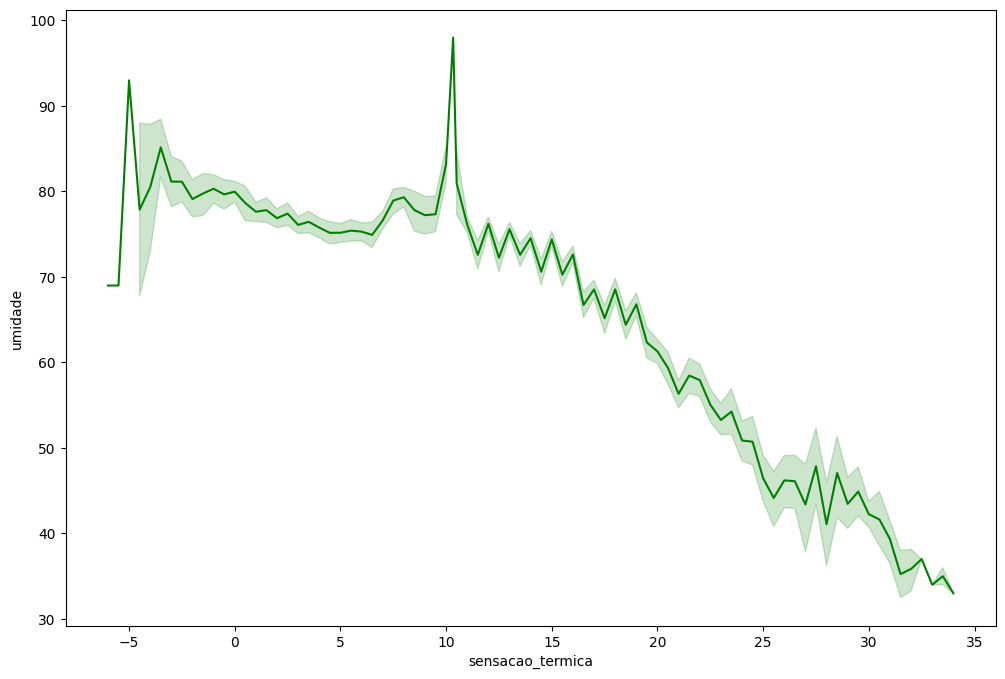

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(12, 8))
sns.lineplot(ax=axes, data = df_limpo, x='sensacao_termica', y='umidade', color='green')

<Axes: xlabel='sensacao_termica', ylabel='temperatura'>

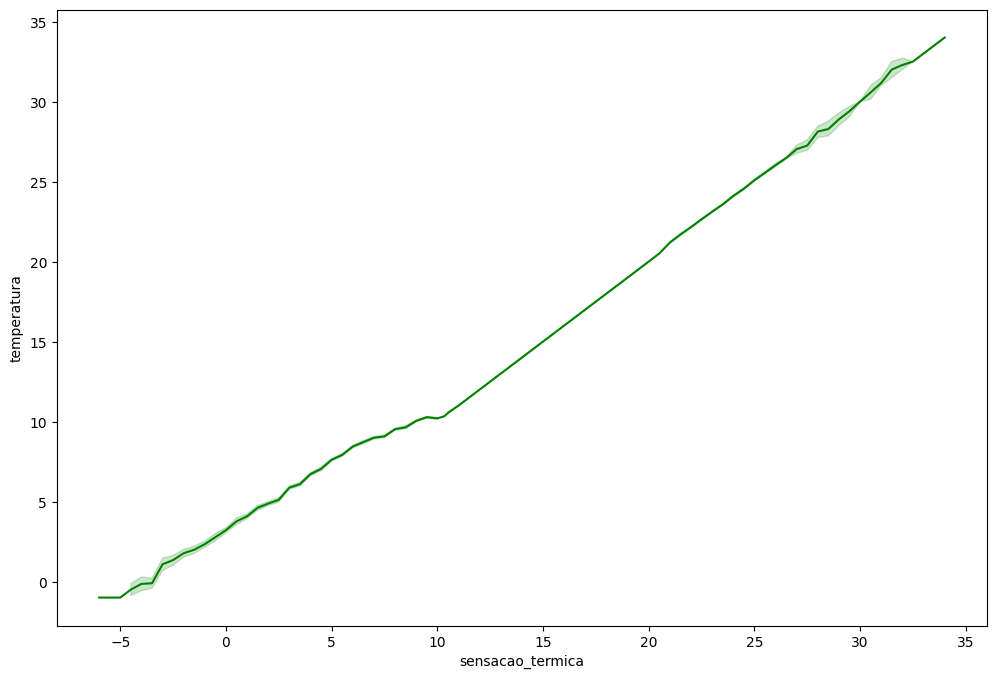

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(12, 8))
sns.lineplot(ax=axes, data = df_limpo, x='sensacao_termica', y='temperatura', color='green')

# AULA 2

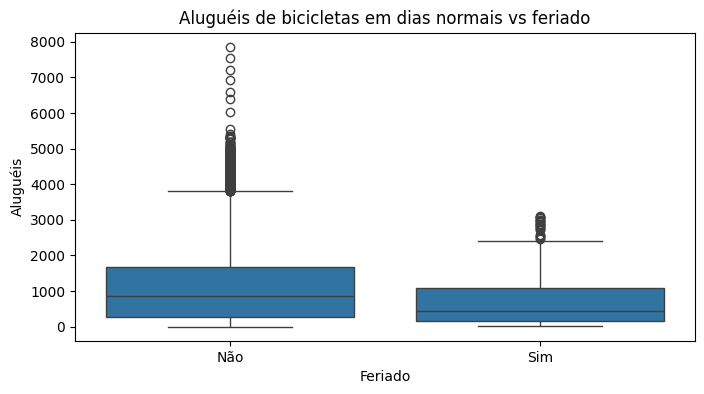

In [ ]:
plt.figure(figsize = (8,4))
sns.boxplot(x='feriado', y='contagem', data=df_limpo)
plt.title('Aluguéis de bicicletas em dias normais vs feriado')
plt.xlabel('Feriado')
plt.ylabel('Aluguéis')
plt.show()

# AULA 3

In [ ]:
# nothing here...
df_limpo.describe(include=[object])

,data_hora,clima,feriado,fim_de_semana,estacao
count,17414,17414,17414,17414,17414
unique,17414,6,2,2,4
top,2017-01-03 23:00:00,Céu limpo,Não,Não,Primavera
freq,1,6150,17030,12444,4394


In [ ]:
# Obtendo os valores únicos de cada coluna

for col in ['clima', 'feriado', 'fim_de_semana', 'estacao']:
  print(f'Coluna: {col}')
  print(df_limpo[col].unique())
  print('='*15, '\n')

Coluna: clima
['Nublado' 'Céu limpo' 'Parcialmente nublado' 'Chuva leve' 'Neve'
 'Chuva com trovoadas']

Coluna: feriado
['Não' 'Sim']

Coluna: fim_de_semana
['Sim' 'Não']

Coluna: estacao
['Inverno' 'Primavera' 'Verão' 'Outono']



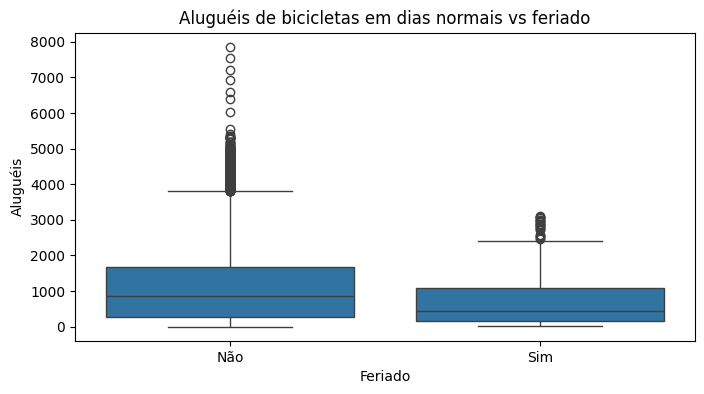

In [ ]:
plt.figure(figsize = (8,4))
sns.boxplot(x='feriado', y='contagem', data=df_limpo)
plt.title('Aluguéis de bicicletas em dias normais vs feriado')
plt.xlabel('Feriado')
plt.ylabel('Aluguéis')
plt.show()

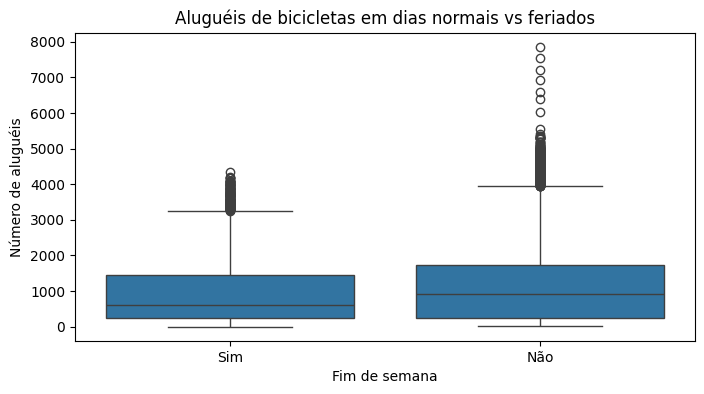

In [ ]:
# Dias finais de semana vs dias normais

plt.figure(figsize=(8,4))
sns.boxplot(x='fim_de_semana', y='contagem', data=df_limpo)
plt.title('Aluguéis de bicicletas em dias normais vs feriados')
plt.xlabel('Fim de semana')
plt.ylabel('Número de aluguéis')
plt.show()

In [ ]:
mediana_feriado = df_limpo.groupby('feriado')['contagem'].median()
mediana_fim_de_semana = df_limpo.groupby("fim_de_semana")['contagem'].median()

In [ ]:
mediana_feriado

,contagem
feriado,
Não,855.0
Sim,439.5


In [ ]:
mediana_fim_de_semana

,contagem
fim_de_semana,
Não,927.0
Sim,619.0


# AULA 7

In [ ]:
# Séries temporais

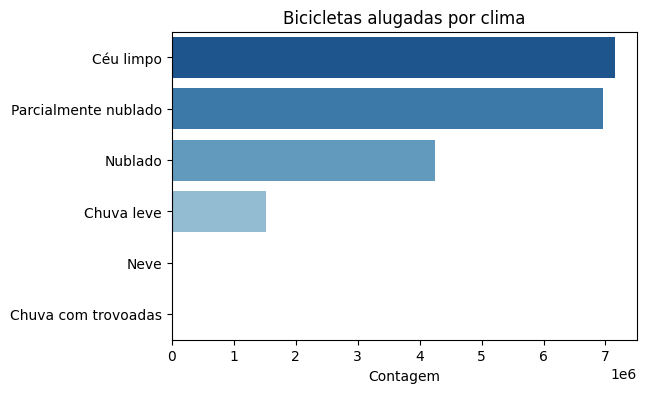

In [ ]:
df_clima = df_limpo.groupby('clima')['contagem'].sum().reset_index().sort_values(by='contagem', ascending=False)

plt.figure(figsize=(6,4))
sns.barplot(data=df_clima, y='clima', x='contagem', hue='clima', palette='Blues_r', orient='h')
plt.title('Bicicletas alugadas por clima')
plt.xlabel('Contagem')
plt.ylabel('')
plt.show()

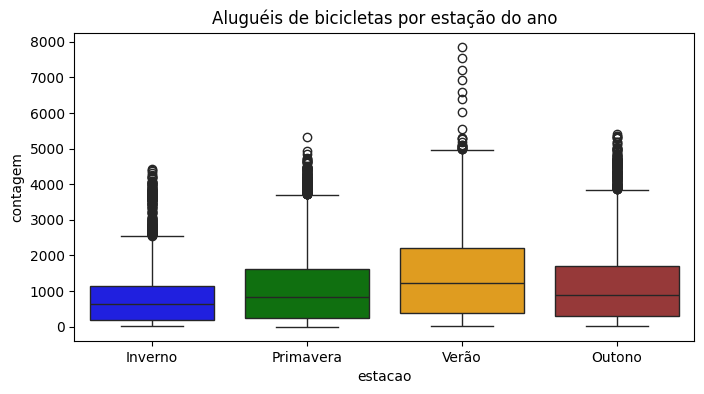

In [ ]:
# iremos analisar a distribuição
plt.figure(figsize=(8, 4))

paleta_cores={'Primavera': 'green', 'Verão': 'orange', 'Outono': 'brown', 'Inverno': 'blue'}
sns.boxplot(x='estacao', y='contagem', data=df_limpo, hue='estacao', palette=paleta_cores)
plt.title('Aluguéis de bicicletas por estação do ano')
plt.show()

In [ ]:
df_limpo.groupby('estacao')['contagem'].median()

,contagem
estacao,
Inverno,632.0
Outono,898.0
Primavera,823.0
Verão,1214.0


Observamos que a primavera e o outono são semelhantes, enquanto outras estações apresentam diferenças significativas. O inverno se destaca com muita diferença, enquanto o verão se destaca pelo alto volume de demanda. Podemos comparar as medianas, como fizemos acima para entender melhor estas diferenças

Portanto, iremos aplicar um teste de hipótese chamado Mann-Whitney onde temos uma aplicação de hipótese não-paramétrico para amostras que são independentes para descobrir se as distribuições da primavera e outono são iguais ou diferentes. Estes testes não paramétricos são úteis quando não podemos ou não queremos assumir que os dados seguem uma distribuição específica

In [ ]:
!pip install scipy

In [ ]:
from scipy.stats import mannwhitneyu

In [ ]:
primavera = df_limpo[df_limpo['estacao']=='Primavera']['contagem']
outono = df_limpo[df_limpo['estacao']=='Outono']['contagem']

u_statistic, p_value = mannwhitneyu(primavera, outono, alternative='two-sided')
u_statistic, p_value

(np.float64(9044682.5), np.float64(0.0004762100221646296))

In [ ]:
# como nosso p_valor deu menos que o alpha definido de 5%, rejeitamos a H0 e aceitamos a H1. Sendo assim, deve ser feito uma campanha de marketing diferente p cada estação do ano pois não é aceito que o outono e primavera tem o mesmo comportamento

# AULA 8

## Série Temporal

In [ ]:
# 1º temos que tratar a coluna de temporal e garantir que a linguagem de programação consiga interpretá-la da maneira certa

In [ ]:
df_data = df_limpo.copy()

In [ ]:
df_data['data_hora'] = pd.to_datetime(df_data['data_hora'])

In [ ]:
df_data.head(2)

,data_hora,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,Nublado,Não,Sim,Inverno
1,2015-01-04 01:00:00,138,NaN,NaN,93.0,5.0,Céu limpo,Não,Sim,Inverno


In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   data_hora         17414 non-null  datetime64[ns]
 1   contagem          17414 non-null  int64         
 2   temperatura       17391 non-null  float64       
 3   sensacao_termica  17391 non-null  float64       
 4   umidade           17414 non-null  float64       
 5   velocidade_vento  17414 non-null  float64       
 6   clima             17414 non-null  object        
 7   feriado           17414 non-null  object        
 8   fim_de_semana     17414 non-null  object        
 9   estacao           17414 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(4)
memory usage: 1.5+ MB


In [ ]:
df_data['mes'] = df_data['data_hora'].dt.month
df_data['hora'] = df_data['data_hora'].dt.hour

In [ ]:
df_data['data_hora'] = pd.to_datetime(df_data['data_hora'])

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17414 entries, 0 to 17413
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   data_hora         17414 non-null  datetime64[ns]
 1   contagem          17414 non-null  int64         
 2   temperatura       17391 non-null  float64       
 3   sensacao_termica  17391 non-null  float64       
 4   umidade           17414 non-null  float64       
 5   velocidade_vento  17414 non-null  float64       
 6   clima             17414 non-null  object        
 7   feriado           17414 non-null  object        
 8   fim_de_semana     17414 non-null  object        
 9   estacao           17414 non-null  object        
 10  mes               17414 non-null  int32         
 11  hora              17414 non-null  int32         
dtypes: datetime64[ns](1), float64(4), int32(2), int64(1), object(4)
memory usage: 1.6+ MB


In [ ]:
df_data['data_hora'] = df_data['data_hora'].dt.date

In [ ]:
df_data = df_data.rename(columns={'data_hora': 'data'})

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17414 entries, 0 to 17413
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   data              17414 non-null  object 
 1   contagem          17414 non-null  int64  
 2   temperatura       17391 non-null  float64
 3   sensacao_termica  17391 non-null  float64
 4   umidade           17414 non-null  float64
 5   velocidade_vento  17414 non-null  float64
 6   clima             17414 non-null  object 
 7   feriado           17414 non-null  object 
 8   fim_de_semana     17414 non-null  object 
 9   estacao           17414 non-null  object 
 10  mes               17414 non-null  int32  
 11  hora              17414 non-null  int32  
dtypes: float64(4), int32(2), int64(1), object(5)
memory usage: 1.6+ MB


In [ ]:
df_data['data'] = pd.to_datetime(df_data['data'])

# AULA 9

Text(0, 0.5, 'Contagem')

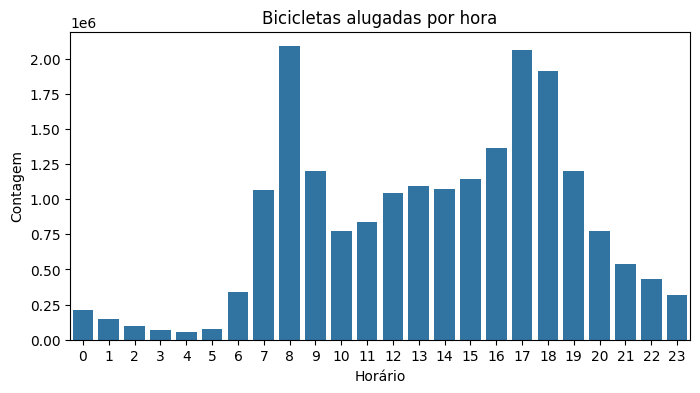

In [ ]:
df_hora = df_data.groupby('hora')['contagem'].sum().reset_index()

plt.figure(figsize=(8,4))
sns.barplot(data=df_hora, x='hora', y='contagem')
plt.title('Bicicletas alugadas por hora')
plt.xlabel('Horário')
plt.ylabel('Contagem')

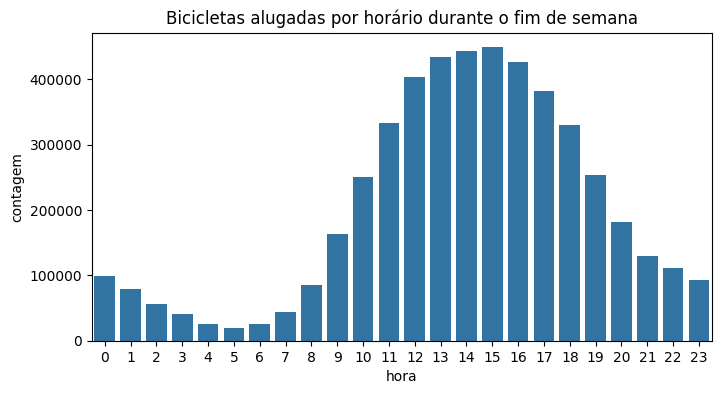

In [ ]:
df_fds = df_data[df_data['fim_de_semana'] == 'Sim']

alugueis_fds = df_fds.groupby('hora')['contagem'].sum().reset_index()

plt.figure(figsize=(8,4))
sns.barplot(x='hora', y='contagem', data=alugueis_fds)
plt.title('Bicicletas alugadas por horário durante o fim de semana')

plt.show()

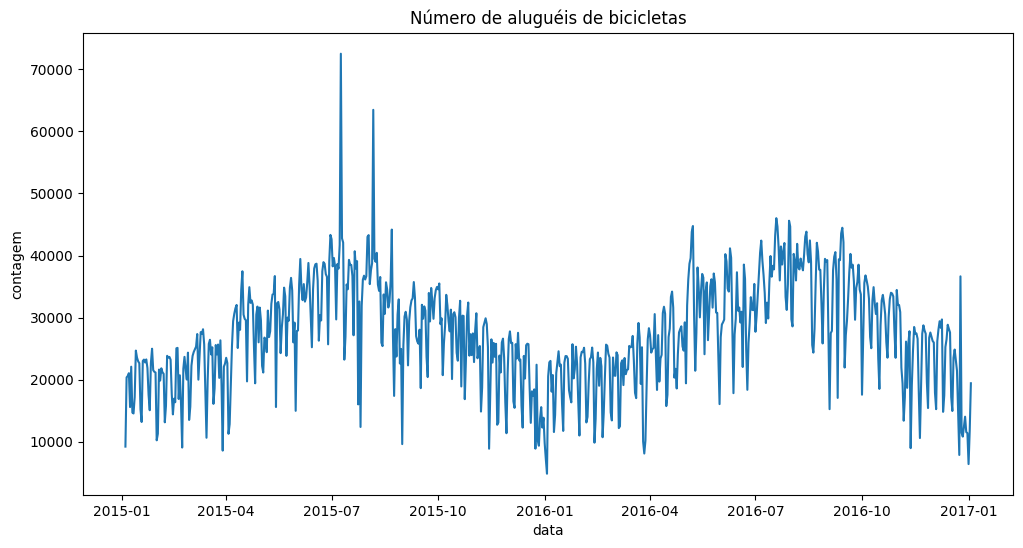

In [ ]:
df_time = df_data.groupby('data')['contagem'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_time, x='data', y='contagem')
plt.title('Número de aluguéis de bicicletas')

plt.show()